In [1]:
%matplotlib inline

In [2]:
from vizztf import ZTFSNViz

In [3]:
from sqlalchemy import create_engine

In [4]:
ztfsky = ZTFSNViz(showVisibleFields=True, 
                  data_dir='/Users/rbiswas/doc/projects/ZTF/data_year/')

/usr/local/miniconda/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


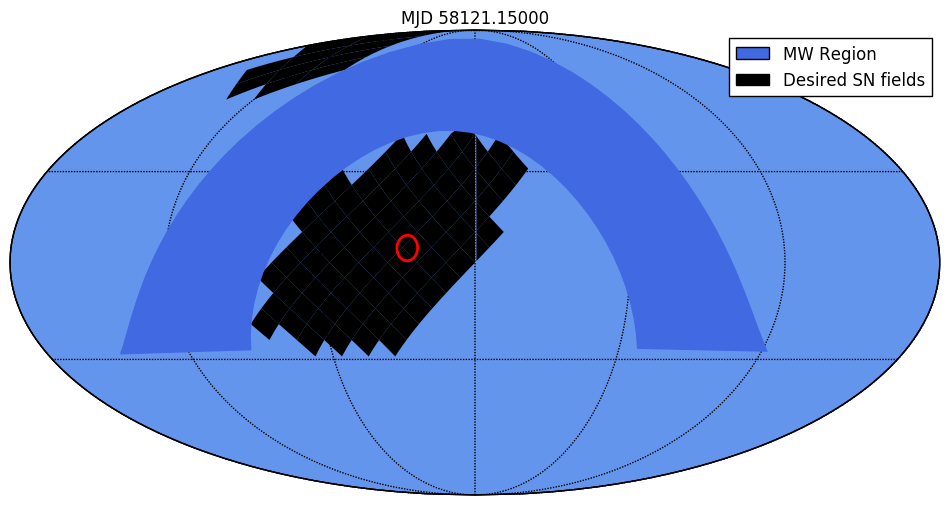

In [5]:
fig, ax, m, xx = ztfsky.generate_image(26.27, 4.55, 4., 58121.15, band='r', alpha=1., mwColor='royalblue',
                                      bg_color='cornflowerblue')

# Locating fields

In [6]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

In [7]:
# Read cadences:
def read_cadence(fname='/Users/rbiswas/Downloads/test_schedule_v3.db'):
    """read the output of a observing strategy simulation into a dataframe
    
    Paramameters
    ------------
    fname : str, optional
        absolute path to the observing stratgy simulation
    """
    fname = 'sqlite:///' + fname
    engine = create_engine(fname)
    df = pd.read_sql_table('Summary', con=engine)
    df.obsHistID = df.obsHistID.astype(np.int)
    df.set_index('obsHistID', inplace=True)
    df.expMJD = df.expMJD + 365 * 2 # ZTF is not done
    return df

In [8]:
obsdf = read_cadence()

In [9]:
df = obsdf.query('night > 30.')

In [10]:
df.expMJD.min()

58149.35630237405

In [11]:
df['expMJD'].head()

obsHistID
14316    58149.356302
14317    58149.356798
14318    58149.357300
14319    58149.357916
14320    58149.358388
Name: expMJD, dtype: float64

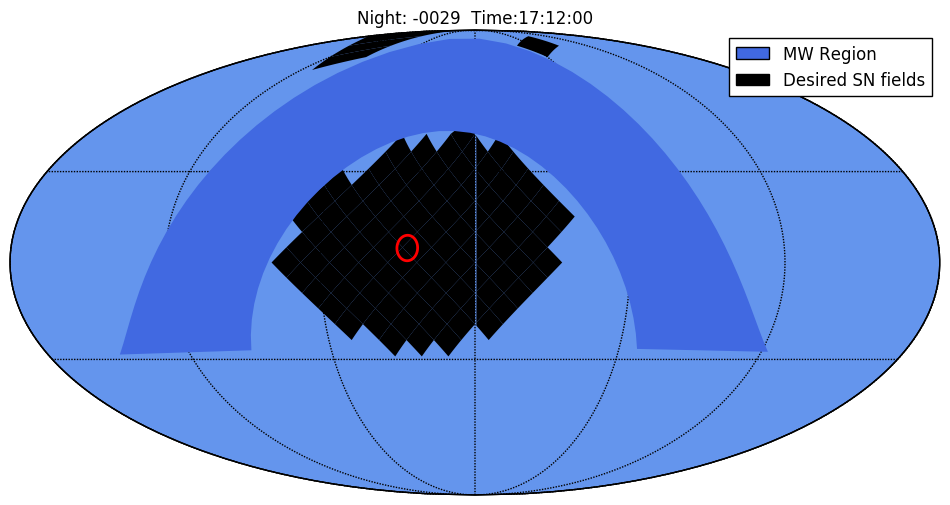

In [12]:
fig, ax, m, xx = ztfsky.generate_image(26.27, 4.55, 4., 58121.05, band='r', alpha=1., mwColor='royalblue',
                                          bg_color='cornflowerblue', surveystart=58149.3)